In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm 
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import itertools


In [2]:
def dataFill(data):
    #print(data.isnull().sum())
    ### data fill ###
    #dt = data.fillna(method='ffill')
    #dt = dt.fillna(method='bfill')
    print("before dataFill data.shape:", data.shape)
    thresh_axis0 = data.shape[1] * 0.1
    thresh_axis1 = data.shape[0] * 0.6
    print("thresh_axis0, thresh_axis1:", thresh_axis0, thresh_axis1)
    dt = data.dropna(axis=1, thresh=thresh_axis1)
    dt = dt.dropna(thresh=thresh_axis0)
    dt = dt.fillna(data.mean())
    print("after dataFill dt.shape:", dt.shape)
    #print(dt.index)
    #print(dt.columns)
    return dt

def dataScale(dt):
    from sklearn.preprocessing import StandardScaler
    for column in dt.columns[2:]:
        #print(column, dt[column].max(), dt[column].min(), dt[column].max()-dt[column].min())
        if dt[column].max()-dt[column].min() == 1:
            dt[column] = (dt[column] - dt[column].min())/(dt[column].max() - dt[column].min())
        else:
            dt[column] = StandardScaler().fit_transform(dt[column].reshape(-1, 1))
    return dt

def dataExtract(dt):
    #X = dt.ix[:, dt.columns != ('y' and  'user_id')]
    #y = dt.ix[:, dt.columns == 'y']
    X = dt.columns.tolist()
    X = X[2:]
    print("X:", X)
    X = dt[X]
    y = dt[["y"]]
    #print(X.head())
    #print(y.head())
    return X, y

def overSample(X, y):
    ### oversample ###
    features_train, features_test, labels_train, labels_test = train_test_split(X,
                                                                                y,
                                                                                test_size=0,
                                                                                random_state=0)
    oversampler=SMOTE(random_state=0)  #实例化参数，只对训练集增广，测试集不动  
    #os_features,os_labels=oversampler.fit_sample(features_train,labels_train)# 使 0 和 1 样本相等  
    os_features,os_labels=oversampler.fit_sample(X, y)# 使 0 和 1 样本相等  
    X_sample = pd.DataFrame(os_features)
    y_sample = pd.DataFrame(os_labels)
    return X_sample, y_sample



<module 'posixpath' from '/usr/lib/python2.7/posixpath.pyc'>
('before dataFill data.shape:', (707, 11))
('thresh_axis0, thresh_axis1:', 1.1, 424.2)
('after dataFill dt.shape:', (707, 11))
                R           G          B1           L           A           B  \
count  707.000000  707.000000  707.000000  707.000000  707.000000  707.000000   
mean   172.961675  150.467999  134.681381  145.274150  136.514969  142.827434   
std     22.121162   21.469461   24.685002   22.532155    2.973003    6.281769   
min    105.783000   95.337700   76.205900   82.091300  127.381000  127.348000   
25%    155.652000  134.556000  115.263000  128.321500  134.536500  138.380500   
50%    171.658000  149.827000  133.799000  144.837000  136.620000  143.366000   
75%    189.125000  166.196000  152.382500  162.136500  138.444000  147.433500   
max    228.857000  213.404000  210.911000  202.845000  145.484000  165.100000   

                H           S           V  
count  707.000000  707.000000  707.000

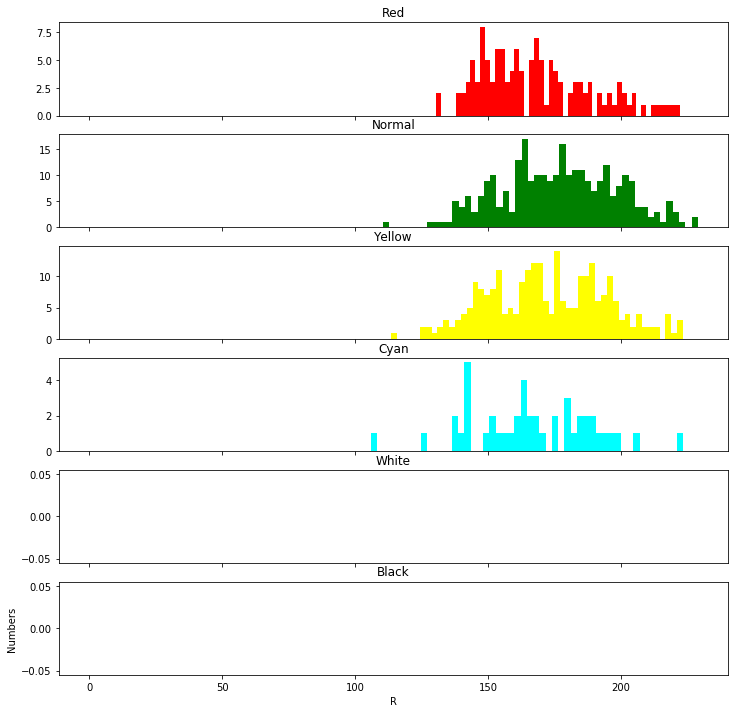

('columns:', 'G')


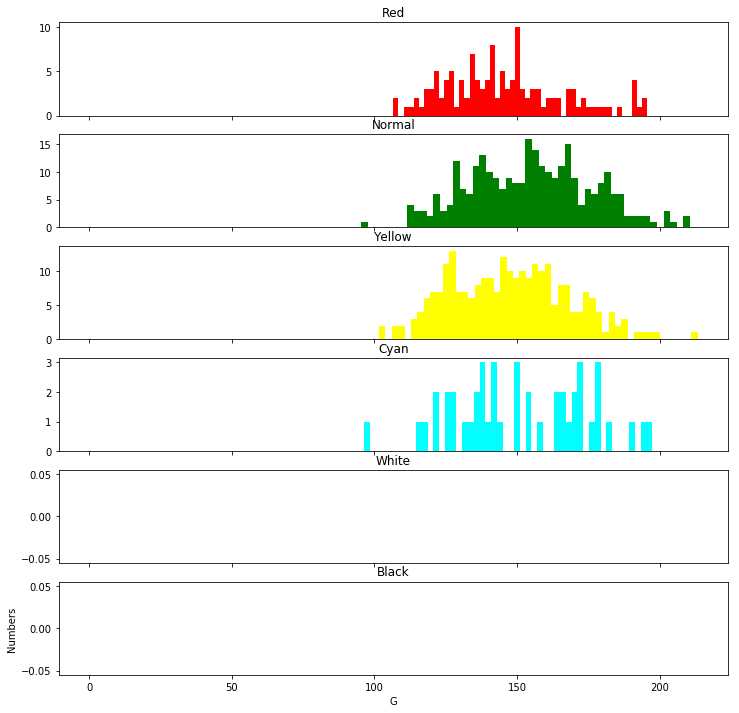

('columns:', 'B1')


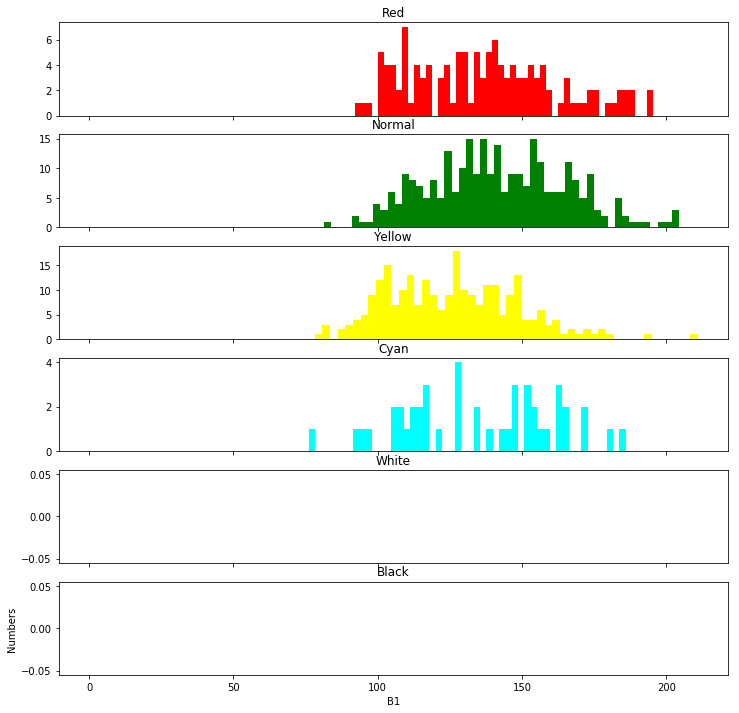

('columns:', 'L')


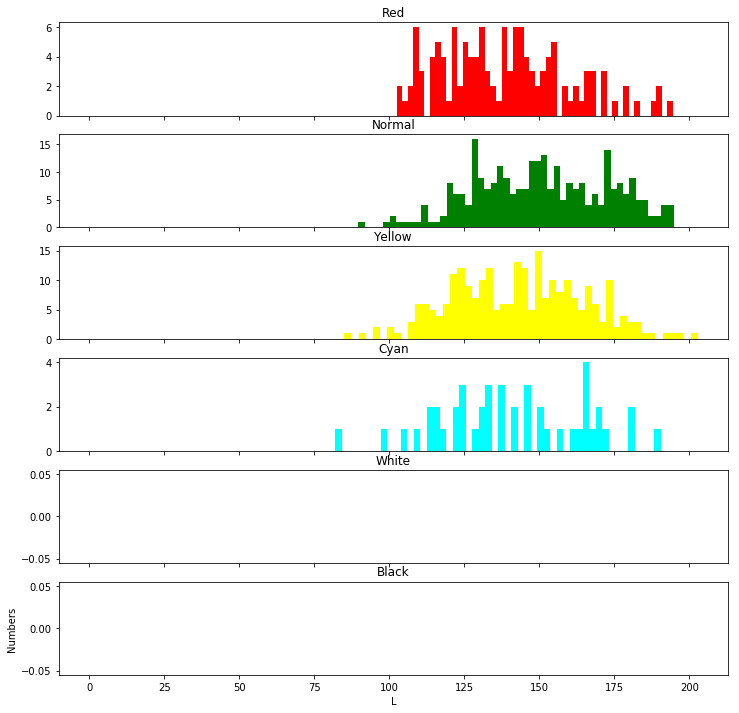

('columns:', 'A')


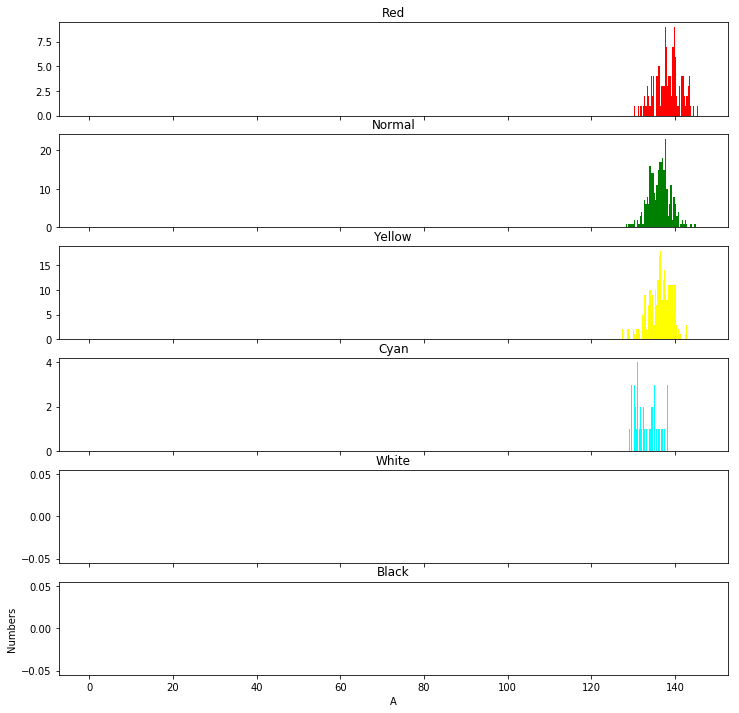

('columns:', 'B')


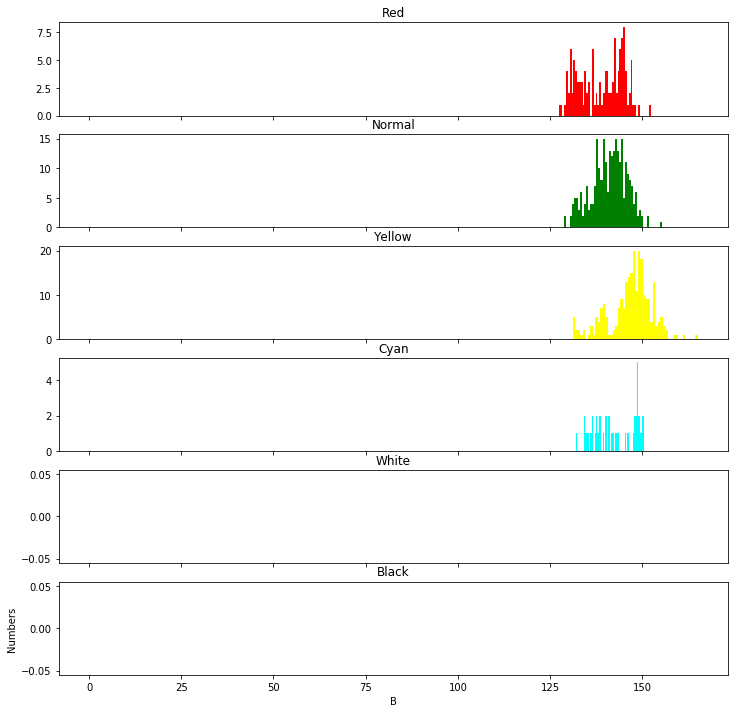

('columns:', 'H')


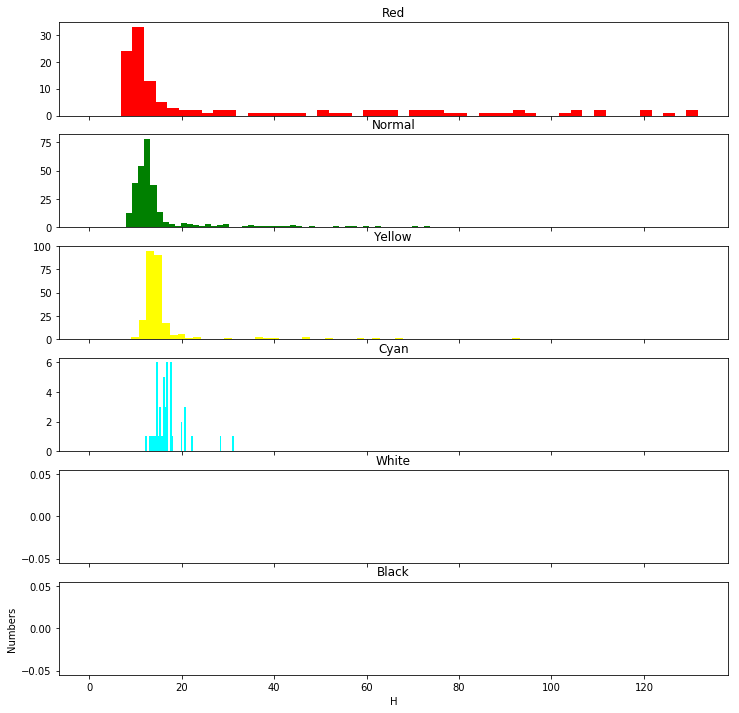

('columns:', 'S')


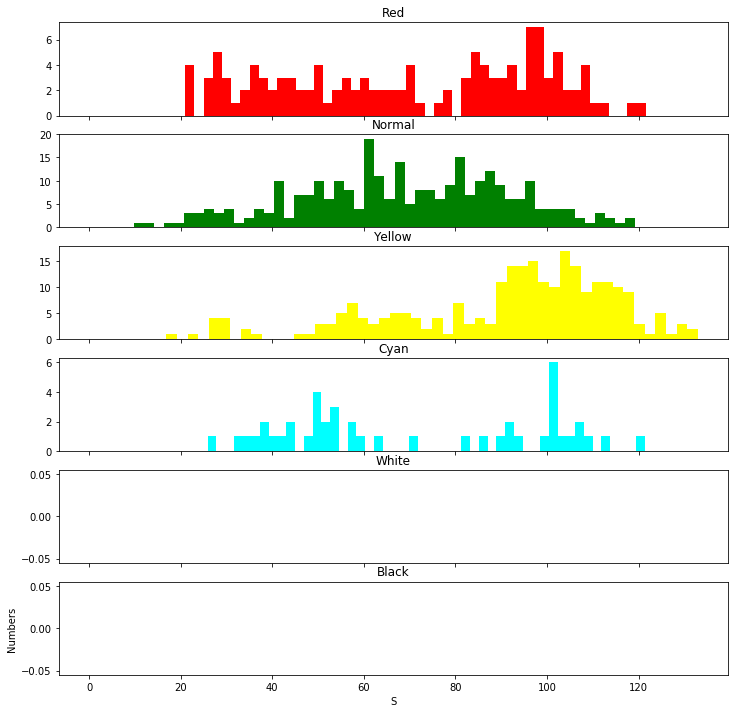

('columns:', 'V')


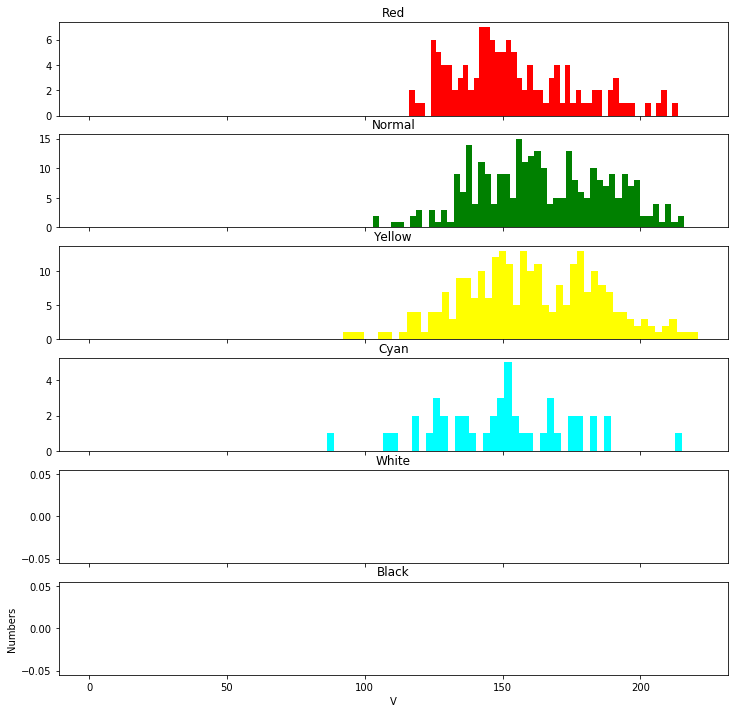

In [3]:
def dataAnalysis(data):
    data = dataFill(data)
    #print(data.dtypes)
    print(data.select_dtypes(include=['float64']).describe())
    print(data.groupby('y').describe())
    
    print(data.A[data.y==1].describe())
    print(data.A[data.y==0].describe())
    print(data.corr())
    
    print(data.groupby('y').size())

    for column in data.columns[2:]:
        print ("columns:", column)

        f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(12,12))
        bins = 50
        ax1.hist(data[column][data.y == 0], bins = bins, facecolor='red')
        ax1.set_title('Red')
        ax2.hist(data[column][data.y == 1], bins = bins, facecolor='green')
        ax2.set_title('Normal')
        ax3.hist(data[column][data.y == 2], bins = bins, facecolor='yellow')
        ax3.set_title('Yellow')
        ax4.hist(data[column][data.y == 3], bins = bins, facecolor='cyan')
        ax4.set_title('Cyan')
        ax5.hist(data[column][data.y == 4], bins = bins, facecolor='blue')
        ax5.set_title('White')
        ax6.hist(data[column][data.y == 5], bins = bins, facecolor='black')
        ax6.set_title('Black')

        plt.xlabel(column)
        plt.ylabel('Numbers')
        plt.show()
    
    #count_classes = pd.y.value_counts(sort = True).sort_index()
    #count_classes.plot(kind = 'bar')
    #plt.title("data")
    #plt.xlabel("y")
    #plt.ylabel("Freq")
    #plt.show()
import os
print os.path
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',100000)
data = pd.read_csv("sample/tailor_colors_without_wb.csv")

dataAnalysis(data)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def calcConfMatrix(y_test_ori, y_predict): 
    # 计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_ori, y_predict)
    np.set_printoptions(precision=2)
    print(cnf_matrix)
    #print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # 非归一化混淆矩阵
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Confusion matrix')


def classifyReport(y_test_ori, y_predict):
    # 分类报告：precision/recall/fi-score/均值/分类个数
    from sklearn.metrics import classification_report
    target_names = ['class 0', 'class 1', 'class2', 'class3']
    print(classification_report(y_test_ori, y_predict, target_names=target_names))
    
def calKappaScore(y_test_ori, y_predict):
    # Kappa score
    from sklearn.metrics import cohen_kappa_score
    kappa_score = cohen_kappa_score(y_test_ori, y_predict)
    print("kappa_score:", kappa_score)


import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor

XGBC = xgb.XGBClassifier(
    #gamma = 0.1,                      # Gamma指定了节点分裂所需的最小损失函数下降值，值越大，算法越保守。  
    #learning_rate = 0.3,              # 学习速率  
    #max_delta_step = 0,               # 限制每棵树权重改变的最大步长。0为没有限制，越大越保守。可用于样本不平衡的时候。  
    #max_depth = 5,                    # 树的最大深度  
    #min_child_weight = 6,             # 最小叶子节点样本权重和。低避免过拟合，太高导致欠拟合。  
    #missing = None,                   # 如果有缺失值则替换。默认 None 就是 np.nan  
    #n_estimators = 250,               # 树的数量  
    #nthread = 8,                      # 并行线程数量  
    #objective = 'binary:logistic',    # 指定学习任务和相应的学习目标或要使用的自定义目标函数  

    gamma = 0.1,                      # Gamma指定了节点分裂所需的最小损失函数下降值，值越大，算法越保守。  
    learning_rate = 0.3,              # 学习速率  
    max_delta_step = 0,               # 限制每棵树权重改变的最大步长。0为没有限制，越大越保守。可用于样本不平衡的时候。  
    max_depth = 5,                    # 树的最大深度  
    min_child_weight = 6,             # 最小叶子节点样本权重和。低避免过拟合，太高导致欠拟合。  
    missing = None,                   # 如果有缺失值则替换。默认 None 就是 np.nan  
    n_estimators = 250,               # 树的数量  
    nthread = 8,                      # 并行线程数量  
    objective = 'binary:logistic',    # 指定学习任务和相应的学习目标或要使用的自定义目标函数  
    #'objective':'multi:softprob',    # 定义学习任务及相应的学习目标  
    #'objective':'reg:linear',        # 线性回归  
    #'objective':'reg:logistic',      # 逻辑回归  
    #'objective':'binary:logistic',   # 二分类的逻辑回归问题，输出为概率  
    #'objective':'binary:logitraw',   # 二分类的逻辑回归问题，输出结果为 wTx，wTx指机器学习线性模型f(x)=wTx+b  
    #'objective':'count:poisson'      # 计数问题的poisson回归，输出结果为poisson分布  
    #'objective':'multi:softmax'      # 让XGBoost采用softmax目标函数处理多分类问题，同时需要设置参数num_class  
    #'objective':'multi:softprob'     # 和softmax一样，但是输出的是ndata * nclass的向量，  
                                      # 可以将该向量reshape成ndata行nclass列的矩阵。  
                                      # 每行数据表示样本所属于每个类别的概率。  
    reg_alpha = 1,                    # 权重的L1正则化项。默认1  
    reg_lambda = 1,                   # 权重的L2正则化项。默认1  
    scale_pos_weight = 10000,         # 数字变大，会增加对少量诈骗样本的学习权重，这里10000比较好  
    seed = 0,                         # 随机种子  
    silent = True,                    # 静默模式开启，不会输出任何信息  
    subsample = 0.9,                  # 控制对于每棵树，随机采样的比例。减小会更加保守，避免过拟,过小会导致欠拟合。  
    base_score = 0.5)                 # 所有实例的初始预测评分,全局偏差   

def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    #plt.xticks(())
    #plt.yticks(())

    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    #plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^', '*']
    colors = ['r', 'b', 'y', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    color=colors[label],
                    marker=markers[label], s=20)
    if draw_sv:
        sv = clf.support_vectors_
        print sv
        plt.scatter(sv[:, 0], sv[:, 1], c='black', marker='x', s=15)


dt = dataFill(data)
dt = dataScale(dt)
X, y = dataExtract(dt)
#X = my_PCA(X)
#X_sample, y_sample = overSample(X, y)
X_sample = X
y_sample = y

N_SPLITS = 1
TRAIN_SIZE = 0.9
TEST_SIZE_ORI = 0.9
    
verify_sample = pd.read_csv("sample/tailor_colors_without_wb.csv")
dt_v = dataFill(verify_sample)
dt_v = dataScale(dt_v)
X_v,y_v = dataExtract(dt_v)
#X_v = pca_sklearn.transform(X_v)
print("X_v.shape:", X_v.shape)

colors = itertools.cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])

def train_lr(X, y , plot_roc=False):
    # grid search for svm
    model = svm.SVC(kernel='rbf')
    c_can = np.logspace(-2,2,10)
    gamma_can = np.logspace(-2,2,10)
    lr = GridSearchCV(model, param_grid={'kernel':('linear', 'rbf', 'poly'), 'C':c_can, 'gamma':gamma_can}, cv=5, n_jobs=8)
    
    # apply svm directly
    #lr = svm.SVC(C=100,kernel="poly",gamma=0.028)
    #lr = LogisticRegression(C=1, penalty='l1')
    #lr = RandomForestClassifier()
    #lr = RandomForestRegressor()

    #lr = XGBC 
    lr.fit(X_sample, y_sample)
    #print("best params:", lr.best_params_)
    y_prediction = lr.predict(X_v)
    plot_hyperplane(lr, X_v.values[:,4:6], y_prediction, draw_sv=False)
    
    # save the pred classes info
    #predict_result = pd.DataFrame(np.array(y_prediction).ravel(), columns=["y_prediction"])
    predict_result = pd.DataFrame()
    predict_result['y_prediction'] = y_prediction
    predict_result['user_id'] = dt.user_id
    #predict_result['user_id'] = predict_result['user_id'].astype('|S')
    #predict_result = predict_result.infer_objects()
    #print("predict_result.dtypes:", predict_result.dtypes)
    #print("predict_result:", predict_result.head())
    print("predict_result:", predict_result)

    calcConfMatrix(y_v, y_prediction)
    classifyReport(y_v, y_prediction)

        
train_lr(X, y, plot_roc=False)


('before dataFill data.shape:', (707, 11))
('thresh_axis0, thresh_axis1:', 1.1, 424.2)
('after dataFill dt.shape:', (707, 11))
('X:', ['R', 'G', 'B1', 'L', 'A', 'B', 'H', 'S', 'V'])
('before dataFill data.shape:', (707, 11))
('thresh_axis0, thresh_axis1:', 1.1, 424.2)
('after dataFill dt.shape:', (707, 11))
('X:', ['R', 'G', 'B1', 'L', 'A', 'B', 'H', 'S', 'V'])
('X_v.shape:', (707, 9))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
